In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
# Assuming the dataset is stored in a list of dictionaries as follows:
data = {
    'YearsExperience': [1.2, 1.4, 1.6, 2.1, 2.3, 3.0, 3.1, 3.3, 3.3, 3.8, 4.0, 4.1, 4.1, 4.2, 4.6, 5.0, 5.2, 5.4, 6.0, 6.1, 6.9, 7.2, 8.0, 8.3, 8.8, 9.1, 9.6, 9.7, 10.4, 10.6],
    'Salary': [39344, 46206, 37732, 43526, 39892, 56643, 60151, 54446, 64446, 57190, 63219, 55795, 56958, 57082, 61112, 67939, 66030, 83089, 81364, 93941, 91739, 98274, 101303, 113813, 109432, 105583, 116970, 112636, 122392, 121873]
}

df = pd.DataFrame(data)
# Separating the features (YearsExperience) and the target variable (Salary)
X = df["YearsExperience"].values.reshape(-1, 1)
y = df["Salary"].values

In [11]:
# Check for missing values and handle them if any
print(df.isnull().sum())
df['Salary'].fillna(df['Salary'].mean(), inplace=True)


In [15]:
X = np.array(data['YearsExperience']).reshape(-1, 1)
y = np.array(data['Salary'])

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model and fit it to the training data
model = LinearRegression()

model.fit(X, y)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Viewing the model's performance metrics (Mean Squared Error and R-squared)
print("Mean Squared Error:", mse)
print("R-squared:", r2)





Mean Squared Error: 49830096.855908334
R-squared: 0.9024461774180498


In [16]:

# Viewing the actual salaries from the test set
print("Actual Salaries:")
print(y_test)


# Extract the slope (m) and y-intercept (c) from the model
m = model.coef_[0]
c = model.intercept_
# Print the equation y = mx + c
print(f"Equation: y = {m:.2f}x + {c:.2f}")

Actual Salaries:
[112636  67939 113813  83089  64446  57190]
Equation: y = 9423.82x + 24380.20


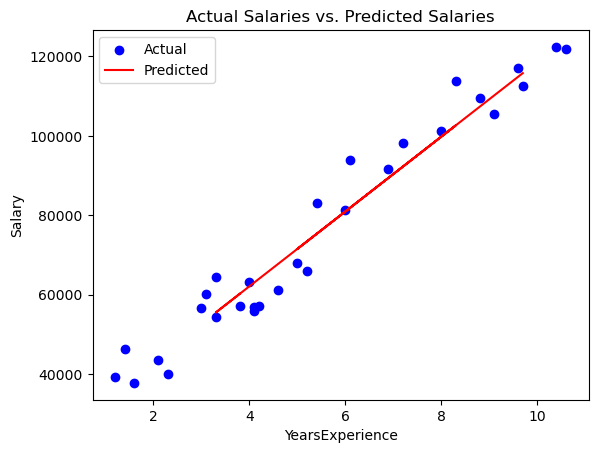

In [17]:


# Comparing the actual salaries and the model's predictions visually
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend()
plt.title('Actual Salaries vs. Predicted Salaries')
plt.show()
